<a href="https://colab.research.google.com/github/Ashkan-Agc/Image-Classification-with-ConvNet-Architecture/blob/main/Image_Classification_with_ConvNet_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classifaction with ConnNet 
I use kears and a detaset of 20000 test image

In [2]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from matplotlib import pyplot as plt

Load our Dataset

In [3]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [6]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [7]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Epoch 1/30
782/782 [==============================] - 31s 8ms/step - loss: 1.7979 - accuracy: 0.3324 - val_loss: 1.2021 - val_accuracy: 0.5721
Epoch 2/30
782/782 [==============================] - 6s 7ms/step - loss: 1.2115 - accuracy: 0.5632 - val_loss: 0.9592 - val_accuracy: 0.6720
Epoch 3/30
782/782 [==============================] - 6s 7ms/step - loss: 1.0008 - accuracy: 0.6466 - val_loss: 0.8333 - val_accuracy: 0.7075
Epoch 4/30
782/782 [==============================] - 6s 7ms/step - loss: 0.8752 - accuracy: 0.6918 - val_loss: 0.7718 - val_accuracy: 0.7279
Epoch 5/30
782/782 [==============================] - 6s 7ms/step - loss: 0.8034 - accuracy: 0.7167 - val_loss: 0.7446 - val_accuracy: 0.7423
Epoch 6/30
782/782 [==============================] - 6s 7ms/step - loss: 0.7517 - accuracy: 0.7376 - val_loss: 0.7371 - val_accuracy: 0.7420
Epoch 7/30
782/782 [==============================] - 6s 7ms/step - loss: 0.7144 - accuracy: 0.7487 - val_loss: 0.6730 - val_accuracy: 0.7665
Epoch

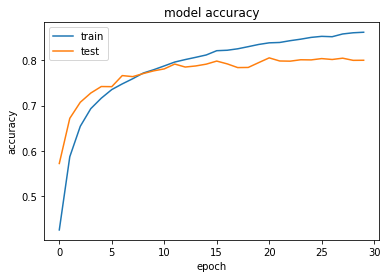

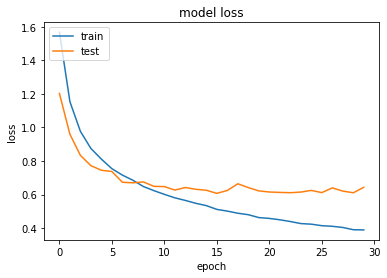

In [8]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
# Save neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("model_weights.h5")


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0